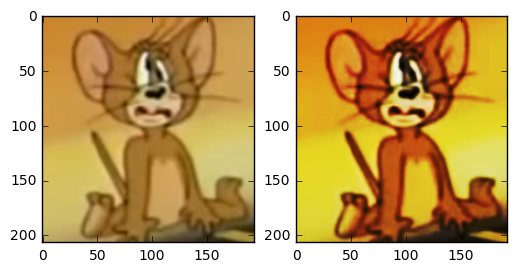

In [190]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

####################################################### QUESTION 1#############################################################
image = cv2.imread("jerry.png")
image_convert = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
output_mat = TransformationMatrix(image_convert)

plt.figure
plt.subplot(121), plt.imshow(image_convert)
plt.subplot(122), plt.imshow(output_mat)
plt.show()


def TransformationMatrix(input_r):
    x = input_r
    x = np.piecewise(x, [x <= 100, x > 100, x >= 165], [lambda x: (2/5)*x, lambda x: (32/13)*x - 206, lambda x: (11/18)*x + 99]) 
    return x
###############################################################################################################################

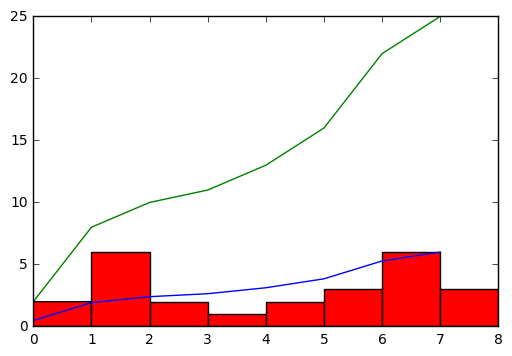

[ 0  6  8  9 11 14 20 23]
161
[0.0 0.037267080745341616 0.049689440993788817 0.055900621118012424
 0.06832298136645963 0.08695652173913043 0.12422360248447205
 0.14285714285714285]


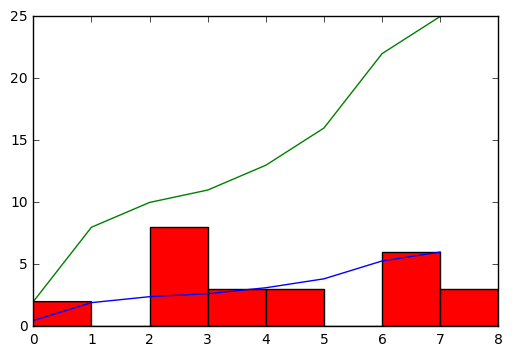

[ 0  6  8  9 11 14 20 23]
161
[0.0 0.037267080745341616 0.049689440993788817 0.055900621118012424
 0.06832298136645963 0.08695652173913043 0.12422360248447205
 0.14285714285714285]


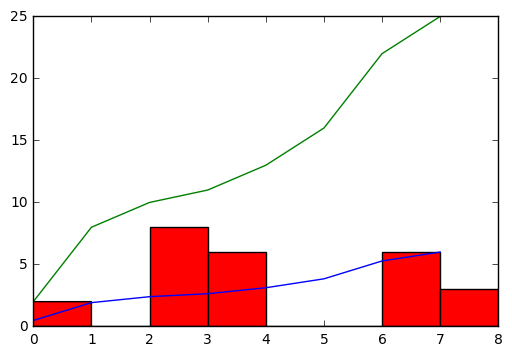

[ 0  6  8  9 11 14 20 23]
161
[0.0 0.037267080745341616 0.049689440993788817 0.055900621118012424
 0.06832298136645963 0.08695652173913043 0.12422360248447205
 0.14285714285714285]


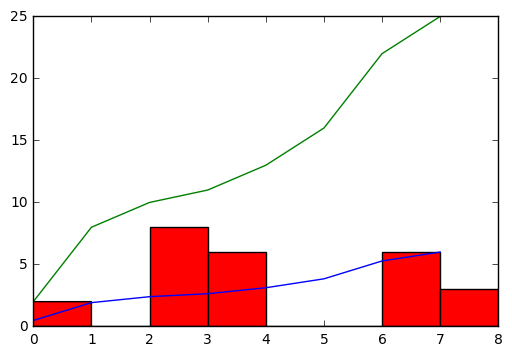

[ 0  6  8  9 11 14 20 23]
161
[0.0 0.037267080745341616 0.049689440993788817 0.055900621118012424
 0.06832298136645963 0.08695652173913043 0.12422360248447205
 0.14285714285714285]


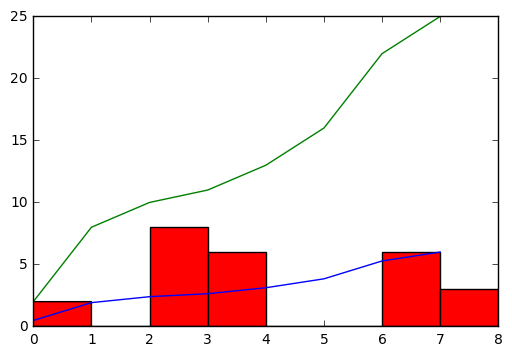

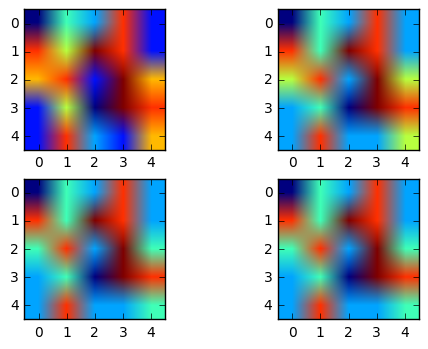

In [238]:
###############################################QUESTION 2############################################################
imageArray = np.array([[0,3,2,6,1], [6,4,7,6,1], [5,6,1,7,5], [1,4,0,7,6], [1,6,2,1,5]])

cdf, cdf_normalized = histogramAnalysis(imageArray)

plt.figure
plt.plot(cdf, color = 'g')
plt.plot(cdf_normalized, color = 'b')
plt.hist(imageArray.flatten(), 8, [0, 8], color = 'r')
plt.xlim([0, 8])
plt.show()
plt.savefig("original")

new_array = histogramEqualize(imageArray, cdf)

cdf, cdf_normalized = histogramAnalysis(new_array)
plt.figure
plt.plot(cdf, color = 'g')
plt.plot(cdf_normalized, color = 'b')
plt.hist(new_array.flatten(), 8, [0, 8], color = 'r')
plt.xlim([0, 8])
plt.savefig("1st")
plt.show()

new_array2 = histogramEqualize(new_array, cdf)

cdf, cdf_normalized = histogramAnalysis(new_array2)
plt.figure
plt.plot(cdf, color = 'g')
plt.plot(cdf_normalized, color = 'b')
plt.hist(new_array2.flatten(), 8, [0, 8], color = 'r')
plt.xlim([0, 8])
plt.savefig("2nd")
plt.show()

new_array3 = histogramEqualize(new_array2, cdf)

cdf, cdf_normalized = histogramAnalysis(new_array3)
plt.figure
plt.plot(cdf, color = 'g')
plt.plot(cdf_normalized, color = 'b')
plt.hist(new_array3.flatten(), 8, [0, 8], color = 'r')
plt.xlim([0, 8])
plt.savefig("3rd")
plt.show()

new_array4 = histogramEqualize(new_array3, cdf)

cdf, cdf_normalized = histogramAnalysis(new_array4)
plt.figure
plt.plot(cdf, color = 'g')
plt.plot(cdf_normalized, color = 'b')
plt.hist(new_array4.flatten(), 8, [0, 8], color = 'r')
plt.xlim([0, 8])
plt.savefig("4th")
plt.show()

plt.figure
plt.subplot(221), plt.imshow(imageArray)
plt.subplot(222), plt.imshow(new_array)
plt.subplot(223), plt.imshow(new_array2)
plt.subplot(224), plt.imshow(new_array3)
plt.savefig("All")
plt.show()
#####################################################################################################################

In [233]:
def histogramAnalysis(arrayInput):
    hist, bins = np.histogram(imageArray.flatten(), 8, [0, 8])
    cdf = hist.cumsum()
    cdf_normalized = cdf * ( hist.max() / cdf.max() )
    return cdf, cdf_normalized

def histogramEqualize(arrayInput, cdf):
    cdf_mask = np.ma.masked_equal(cdf, 0)
    tempA = cdf_mask - cdf_mask.min()
    tempB =  ( cdf_mask.max() - cdf_mask.min() ) * 7
    print(tempA)
    print(tempB)
    print((tempA / tempB))
    cdf_mask = np.round( ( cdf_mask - cdf_mask.min() ) /  (cdf_mask.max() - cdf_mask.min()) * 7  )
    
    new_cdf = np.ma.filled(cdf_mask, 0).astype('uint8')
    new_output_array = new_cdf[arrayInput]
    return new_output_array